## Packages

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the model
# cv_model = pickle.load(open('../../Data/GoogleDrive/Baseline_Models/Under_Sample_1:1_threshold_20_MLPbaseline.pkl', 'rb'))

In [3]:
# score? 
# use some random scores to test
# scores = cv_model.validation_scores_

In [3]:
root_path = "../../Data/GoogleDrive/MLP_Results/"
combined_results = pd.read_parquet(root_path + "test_results-combined.parquet")
combined_results

,Dataset_Name,Grid_Variable,Recall,ROC_AUC,Accuracy,Fit_Time
0,Under_Sample_1:1_threshold_20,learning_rate_init,0.767905,0.816309,0.730010,72.824502
1,Under_Sample_1:1_threshold_20,max_iter,0.752738,0.814254,0.732085,105.687169
2,Under_Sample_1:1_threshold_20,batch_size,0.736729,0.815755,0.742620,150.978772
3,Under_Sample_1:1_threshold_20,iter_no_change,0.712601,0.808466,0.745294,399.201779
4,Under_Sample_1:1_threshold_20,_best_params,0.811796,0.814387,0.691627,162.356431
5,Under_Sample_1:1_threshold_20,bayes,0.770816,0.813239,0.722086,49.996617
6,Under_Sample_1:1_threshold_20,momentum,0.752738,0.814254,0.732085,108.784148
7,Under_Sample_1:1_threshold_20,neurons,0.448487,0.729403,0.795750,379.136686
8,Under_Sample_1:1_threshold_20,alpha,0.719418,0.811282,0.745786,101.764314
9,Under_Sample_1:1_threshold_20,layers,0.518116,0.760817,0.809887,832.888808


## Tuning Parameters

- binary parameter tuning: quick comparison of two values
- continuous parameter tuning: line plot
- multiple continuous parameters tuning: heatmap

### quick rundown of what the error analysis plot looks like 

- X-axis: Displays different parameter combinations as strings, representing the values of hidden_layer_sizes and alpha. Each point on the axis corresponds to a specific combination, like {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}.

- Y-axis: Shows the mean cross-validation accuracy for each parameter setting. The scale depends on the accuracy scores obtained, typically ranging from 0 to 1.

- Error bars: Each point has an error bar that represents the standard deviation of the accuracy across the cross-validation folds. This gives an idea of the variability or stability of the model's performance with those specific parameters.

- Markers: Each parameter combination is represented by a circle ('o' marker) on the plot.

- Legend: The legend includes entries for each parameter setting, making it easier to identify which parameters correspond to each point on the plot.

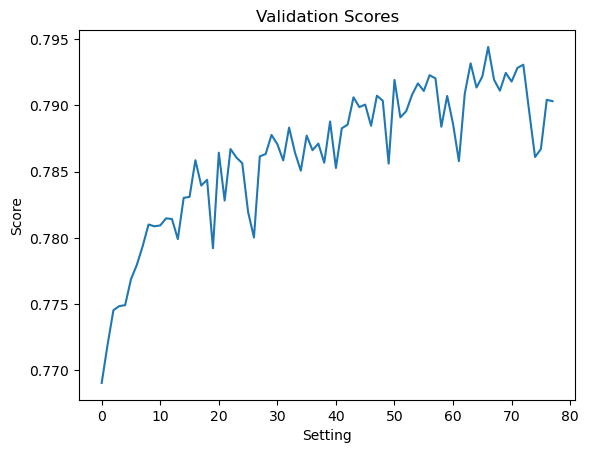

In [4]:
plt.plot(scores)
plt.title('Validation Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
plt.show()

(0.7, 0.8)

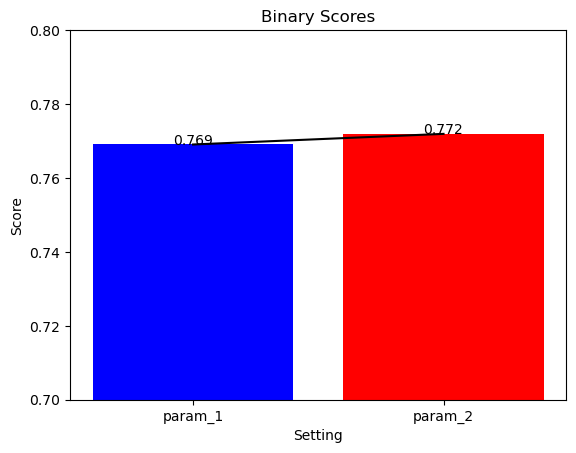

In [8]:
# for binary 
bi_score = scores[:2]
# bar plot for binary
plt.bar(['param_1', 'param_2'], bi_score, color = ['blue', 'red'])
# add line plot to show trend 
plt.plot(bi_score, color = 'black')
for i in range(2):
    plt.text(i, bi_score[i], round(bi_score[i], 3), ha = 'center')
plt.title('Binary Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
# adjust the y-axis
plt.ylim(0.7, 0.8)

## Entire Training Process

- table of metrics
- line plot to show the fluctuation of metrics from the baseline to the final model

### what the plot contains

- X-axis: Displays the number of iterations or epochs, representing the training progress from the start to the end.

- Y-axis: Shows the value of the metric being tracked, such as loss or accuracy. The scale depends on the metric values obtained, typically ranging from 0 to 1.

two options: 

1. 
- Lines: Each line represents a different metric, such as training loss, validation loss, training accuracy, or validation accuracy. The lines show how the metric changes over time during training.

- Legend: The legend includes entries for each metric, making it easier to identify which line corresponds to each metric.

2. 

- Line: A single line represents the metric being tracked, such as training loss, validation loss, training accuracy, or validation accuracy. The line shows how the metric changes over time during training.

- Line sections: Different sections of the line can be colored or styled differently to indicate different stages of training (aka different tuning parameters).

Text(60, 0.769056058364018, '')

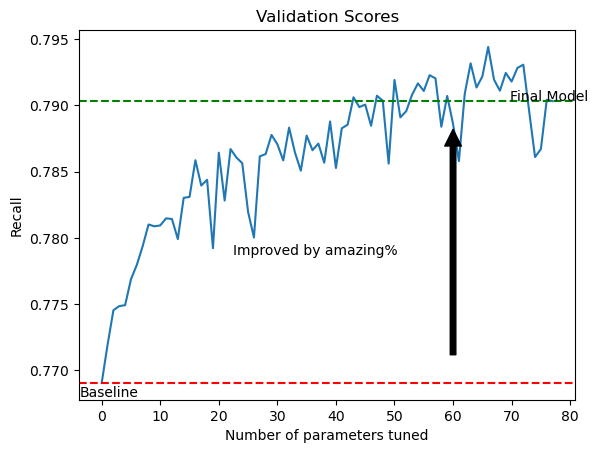

In [73]:
# option 2 

plt.plot(scores)
plt.title('Validation Scores')
plt.xlabel('Number of parameters tuned')
plt.ylabel('Recall')
# label the best score and the first score
plt.annotate('Final Model', (80, scores[-1]), 
             textcoords = "offset points", 
             xytext = (-15,0), ha = 'center')
plt.annotate('Baseline', (0, scores[0]), 
             textcoords = "offset points", xytext = (5,-10), ha = 'center')
# add line for baseline
plt.axhline(y=scores[0], color='r', linestyle='--')
# add line for final model
plt.axhline(y=scores[-1], color='g', linestyle='--')
# add difference between the two 
plt.annotate('Improved by amazing%', (40, (scores[-1] + scores[0])/2), 
             textcoords = "offset points", 
             xytext = (-15,-9), ha = 'center')

# add arrow to show improvement
plt.annotate('', (60, scores[-1]), (60, scores[0]), 
             arrowprops=dict(facecolor='black', shrink=0.1))